In [35]:
import pandas as pd
from strategy import Strategy
from league import League
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset('db.csv')
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})

df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: League.cpt_winner(x[0], x[1]), axis=1)


Found file


In [45]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 212
strategy_A_P_rank_1__A_G_rank_2__1.json
strategy_3M_H_G_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
strategy_3M_H_G_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
strategy_3M_H_G_rank_coeff_1__3M_A_P_rank_coeff_2__1.json
strategy_3M_H_GA_rank_1__3M_GA_rank_2__3.json
strategy_3M_H_GA_rank_1__3M_GA_rank_2__2.json
strategy_3M_H_GA_rank_1__3M_GA_rank_2__1.json
strategy_3M_GA_rank_1__P_rank_2__3.json
strategy_3M_GA_rank_1__P_rank_2__2.json
strategy_3M_GA_rank_1__P_rank_2__1.json
strategy_3M_H_GA_rank_coeff_1__P_rank_2__3.json
strategy_3M_H_GA_rank_coeff_1__P_rank_2__2.json
strategy_3M_H_GA_rank_coeff_1__P_rank_2__1.json
strategy_A_G_rank_1__P_rank_2__3.json
strategy_A_G_rank_1__P_rank_2__2.json
strategy_A_G_rank_1__P_rank_2__1.json
strategy_H_G_rank_1__H_P_rank_2__3.json
strategy_H_G_rank_1__H_P_rank_2__2.json
strategy_H_G_rank_1__H_P_rank_2__1.json
strategy_A_P_rank_1__3M_A_G_rank_2__3.json
strategy_A_P_rank_1__3M_A_G_rank_2__2.json
strategy_A_P_rank_1__3M_A_G_rank_2__1.json
strategy_

In [46]:
dic = {}
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index(drop=True)
    strategy_stats = {}
    strategy_stats["strategy"] = strategy
    strategy_stats["n_matches"] = len(matches)
    strategy_stats["total_revenue"] = matches.gain.sum()
    strategy_stats["roi"] = matches.gain.sum() / len(matches) * 100
    strategy_stats["n_wins"] = len(matches[matches.result == result])
    strategy_stats["winning_rate"] = len(matches[matches.result == result]) / len(matches) * 100
    strategy_stats["avg_odd"] = matches[f'bet365_{result}'].mean()
    
    print(strategy_stats)
    print()
    dic[s] = strategy_stats

    #print(f'Number of matches: {len(matches)}')
    #print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    #print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    #print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    #print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    #print(f"Average odd: {matches[f'bet365_{result}'].mean()}")

strategy_A_P_rank_1__A_G_rank_2__1.json
{'A_P_rank_1': [15, 27], 'A_G_rank_2': [3, 13], 'result': 1, 'bet365_1': [4.6, 8.790000000000001]}
{'strategy': {'A_P_rank_1': [15, 27], 'A_G_rank_2': [3, 13], 'result': 1, 'bet365_1': [4.6, 8.790000000000001]}, 'n_matches': 1814, 'total_revenue': 349.0, 'roi': 19.239250275633957, 'n_wins': 370, 'winning_rate': 20.39691289966924, 'avg_odd': 5.953687982359426}

strategy_3M_H_G_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
{'3M_H_G_rank_coeff_1': [9, 14], '3M_A_P_rank_coeff_2': [20, 22], 'result': 3, 'bet365_3': [4.62, 12.0]}
{'strategy': {'3M_H_G_rank_coeff_1': [9, 14], '3M_A_P_rank_coeff_2': [20, 22], 'result': 3, 'bet365_3': [4.62, 12.0]}, 'n_matches': 479, 'total_revenue': 99.25, 'roi': 20.72025052192067, 'n_wins': 95, 'winning_rate': 19.832985386221296, 'avg_odd': 6.409185803757829}

strategy_3M_H_G_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
{'3M_H_G_rank_coeff_1': [7, 13], '3M_A_P_rank_coeff_2': [1, 16], 'result': 2, 'bet365_2': [9.61, 11.42]}
{'s

strategy_A_GA_rank_1__A_P_rank_2__3.json
{'A_GA_rank_1': [4, 18], 'A_P_rank_2': [10, 26], 'result': 3, 'bet365_3': [7.890000000000001, 9.86]}
{'strategy': {'A_GA_rank_1': [4, 18], 'A_P_rank_2': [10, 26], 'result': 3, 'bet365_3': [7.890000000000001, 9.86]}, 'n_matches': 2638, 'total_revenue': 288.5, 'roi': 10.936315390447309, 'n_wins': 341, 'winning_rate': 12.926459438968916, 'avg_odd': 8.59059893858984}

strategy_A_GA_rank_1__A_P_rank_2__2.json
{'A_GA_rank_1': [18, 27], 'A_P_rank_2': [4, 28], 'result': 2, 'bet365_2': [7.16, 8.97]}
{'strategy': {'A_GA_rank_1': [18, 27], 'A_P_rank_2': [4, 28], 'result': 2, 'bet365_2': [7.16, 8.97]}, 'n_matches': 18, 'total_revenue': 38.0, 'roi': 211.11111111111111, 'n_wins': 7, 'winning_rate': 38.88888888888889, 'avg_odd': 7.861111111111111}

strategy_A_GA_rank_1__A_P_rank_2__1.json
{'A_GA_rank_1': [15, 26], 'A_P_rank_2': [2, 16], 'result': 1, 'bet365_1': [4.59, 9.82]}
{'strategy': {'A_GA_rank_1': [15, 26], 'A_P_rank_2': [2, 16], 'result': 1, 'bet365_1':

strategy_H_G_rank_1__H_GA_rank_2__2.json
{'H_G_rank_1': [4, 6], 'H_GA_rank_2': [21, 28], 'result': 2, 'bet365_2': [3.33, 10.709999999999999]}
{'strategy': {'H_G_rank_1': [4, 6], 'H_GA_rank_2': [21, 28], 'result': 2, 'bet365_2': [3.33, 10.709999999999999]}, 'n_matches': 329, 'total_revenue': 74.43, 'roi': 22.62310030395137, 'n_wins': 103, 'winning_rate': 31.30699088145897, 'avg_odd': 4.034468085106383}

strategy_H_G_rank_1__H_GA_rank_2__1.json
{'H_G_rank_1': [2, 11], 'H_GA_rank_2': [2, 11], 'result': 1, 'bet365_1': [4.25, 7.460000000000001]}
{'strategy': {'H_G_rank_1': [2, 11], 'H_GA_rank_2': [2, 11], 'result': 1, 'bet365_1': [4.25, 7.460000000000001]}, 'n_matches': 3559, 'total_revenue': 358.29999999999995, 'roi': 10.067434672660859, 'n_wins': 756, 'winning_rate': 21.241921888170832, 'avg_odd': 5.299407136836189}

strategy_G_rank_1__3M_A_G_rank_coeff_2__3.json
{'G_rank_1': [18, 25], '3M_A_G_rank_coeff_2': [1, 24], 'result': 3, 'bet365_3': [5.7, 8.290000000000001]}
{'strategy': {'G_rank

{'strategy': {'H_P_rank_1': [3, 27], '3M_A_G_rank_2': [8, 18], 'result': 2, 'bet365_2': [9.94, 11.43]}, 'n_matches': 103, 'total_revenue': 74.0, 'roi': 71.84466019417476, 'n_wins': 17, 'winning_rate': 16.50485436893204, 'avg_odd': 10.533980582524272}

strategy_H_P_rank_1__3M_A_G_rank_2__1.json
{'H_P_rank_1': [15, 19], '3M_A_G_rank_2': [19, 24], 'result': 1, 'bet365_1': [2.79, 7.300000000000001]}
{'strategy': {'H_P_rank_1': [15, 19], '3M_A_G_rank_2': [19, 24], 'result': 1, 'bet365_1': [2.79, 7.300000000000001]}, 'n_matches': 241, 'total_revenue': 43.260000000000005, 'roi': 17.95020746887967, 'n_wins': 84, 'winning_rate': 34.85477178423236, 'avg_odd': 3.467095435684647}

strategy_3M_G_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
{'3M_G_rank_coeff_1': [9, 26], '3M_A_P_rank_coeff_2': [24, 26], 'result': 3, 'bet365_3': [2.6, 8.98]}
{'strategy': {'3M_G_rank_coeff_1': [9, 26], '3M_A_P_rank_coeff_2': [24, 26], 'result': 3, 'bet365_3': [2.6, 8.98]}, 'n_matches': 411, 'total_revenue': 76.84, 'roi':

strategy_3M_P_rank_1__A_G_rank_2__1.json
{'3M_P_rank_1': [14, 20], 'A_G_rank_2': [6, 15], 'result': 1, 'bet365_1': [4.21, 6.58]}
{'strategy': {'3M_P_rank_1': [14, 20], 'A_G_rank_2': [6, 15], 'result': 1, 'bet365_1': [4.21, 6.58]}, 'n_matches': 1354, 'total_revenue': 155.68, 'roi': 11.497784342688332, 'n_wins': 301, 'winning_rate': 22.23042836041359, 'avg_odd': 5.1392909896602665}

strategy_3M_H_P_rank_coeff_1__P_rank_2__3.json
{'3M_H_P_rank_coeff_1': [17, 23], 'P_rank_2': [2, 9], 'result': 3, 'bet365_3': [6.82, 9.18]}
{'strategy': {'3M_H_P_rank_coeff_1': [17, 23], 'P_rank_2': [2, 9], 'result': 3, 'bet365_3': [6.82, 9.18]}, 'n_matches': 55, 'total_revenue': 51.0, 'roi': 92.72727272727272, 'n_wins': 14, 'winning_rate': 25.454545454545453, 'avg_odd': 7.654545454545454}

strategy_3M_H_P_rank_coeff_1__P_rank_2__2.json
{'3M_H_P_rank_coeff_1': [1, 12], 'P_rank_2': [8, 25], 'result': 2, 'bet365_2': [9.89, 10.83]}
{'strategy': {'3M_H_P_rank_coeff_1': [1, 12], 'P_rank_2': [8, 25], 'result': 2, '

{'strategy': {'A_GA_rank_1': [4, 28], '3M_P_rank_coeff_2': [3, 20], 'result': 1, 'bet365_1': [4.609999999999999, 8.57]}, 'n_matches': 5270, 'total_revenue': 363.2, 'roi': 6.891840607210625, 'n_wins': 973, 'winning_rate': 18.462998102466795, 'avg_odd': 5.94049146110057}

strategy_H_GA_rank_1__P_rank_2__3.json
{'H_GA_rank_1': [13, 24], 'P_rank_2': [5, 11], 'result': 3, 'bet365_3': [6.13, 10.11]}
{'strategy': {'H_GA_rank_1': [13, 24], 'P_rank_2': [5, 11], 'result': 3, 'bet365_3': [6.13, 10.11]}, 'n_matches': 379, 'total_revenue': 126.5, 'roi': 33.37730870712401, 'n_wins': 68, 'winning_rate': 17.941952506596305, 'avg_odd': 7.518469656992084}

strategy_H_GA_rank_1__P_rank_2__2.json
{'H_GA_rank_1': [18, 22], 'P_rank_2': [17, 26], 'result': 2, 'bet365_2': [4.9399999999999995, 5.630000000000001]}
{'strategy': {'H_GA_rank_1': [18, 22], 'P_rank_2': [17, 26], 'result': 2, 'bet365_2': [4.9399999999999995, 5.630000000000001]}, 'n_matches': 30, 'total_revenue': 33.1, 'roi': 110.33333333333333, 'n_wi

strategy_P_rank_1__3M_A_GA_rank_2__1.json
{'P_rank_1': [16, 26], '3M_A_GA_rank_2': [1, 16], 'result': 1, 'bet365_1': [4.62, 8.94]}
{'strategy': {'P_rank_1': [16, 26], '3M_A_GA_rank_2': [1, 16], 'result': 1, 'bet365_1': [4.62, 8.94]}, 'n_matches': 2463, 'total_revenue': 327.0, 'roi': 13.276492082825822, 'n_wins': 475, 'winning_rate': 19.285424279334144, 'avg_odd': 6.0254120990661795}

strategy_P_rank_1__3M_GA_rank_2__3.json
{'P_rank_1': [11, 26], '3M_GA_rank_2': [16, 25], 'result': 3, 'bet365_3': [5.950000000000001, 10.0]}
{'strategy': {'P_rank_1': [11, 26], '3M_GA_rank_2': [16, 25], 'result': 3, 'bet365_3': [5.950000000000001, 10.0]}, 'n_matches': 976, 'total_revenue': 181.75, 'roi': 18.621926229508194, 'n_wins': 163, 'winning_rate': 16.700819672131146, 'avg_odd': 7.11577868852459}

strategy_P_rank_1__3M_GA_rank_2__2.json
{'P_rank_1': [13, 26], '3M_GA_rank_2': [25, 27], 'result': 2, 'bet365_2': [2.8600000000000003, 9.6]}
{'strategy': {'P_rank_1': [13, 26], '3M_GA_rank_2': [25, 27], 're

strategy_P_rank_1__H_GA_rank_2__1.json
{'P_rank_1': [15, 26], 'H_GA_rank_2': [1, 16], 'result': 1, 'bet365_1': [4.640000000000001, 8.709999999999999]}
{'strategy': {'P_rank_1': [15, 26], 'H_GA_rank_2': [1, 16], 'result': 1, 'bet365_1': [4.640000000000001, 8.709999999999999]}, 'n_matches': 3034, 'total_revenue': 337.0, 'roi': 11.107448912326962, 'n_wins': 579, 'winning_rate': 19.083717864205667, 'avg_odd': 6.032824653922215}

strategy_P_rank_1__GA_rank_2__3.json
{'P_rank_1': [3, 11], 'GA_rank_2': [4, 13], 'result': 3, 'bet365_3': [7.960000000000001, 9.709999999999999]}
{'strategy': {'P_rank_1': [3, 11], 'GA_rank_2': [4, 13], 'result': 3, 'bet365_3': [7.960000000000001, 9.709999999999999]}, 'n_matches': 2134, 'total_revenue': 382.0, 'roi': 17.90065604498594, 'n_wins': 294, 'winning_rate': 13.776944704779757, 'avg_odd': 8.598875351452671}

strategy_P_rank_1__GA_rank_2__2.json
{'P_rank_1': [24, 25], 'GA_rank_2': [11, 24], 'result': 2, 'bet365_2': [1.2400000000000002, 3.25]}
{'strategy': {'

strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__3.json
{'3M_G_rank_coeff_1': [17, 26], '3M_GA_rank_coeff_2': [16, 21], 'result': 3, 'bet365_3': [4.96, 9.62]}
{'strategy': {'3M_G_rank_coeff_1': [17, 26], '3M_GA_rank_coeff_2': [16, 21], 'result': 3, 'bet365_3': [4.96, 9.62]}, 'n_matches': 882, 'total_revenue': 132.5, 'roi': 15.022675736961451, 'n_wins': 166, 'winning_rate': 18.820861678004537, 'avg_odd': 6.205498866213152}

strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__2.json
{'3M_G_rank_coeff_1': [16, 19], '3M_GA_rank_coeff_2': [2, 24], 'result': 2, 'bet365_2': [5.880000000000001, 8.879999999999999]}
{'strategy': {'3M_G_rank_coeff_1': [16, 19], '3M_GA_rank_coeff_2': [2, 24], 'result': 2, 'bet365_2': [5.880000000000001, 8.879999999999999]}, 'n_matches': 230, 'total_revenue': 45.0, 'roi': 19.565217391304348, 'n_wins': 41, 'winning_rate': 17.82608695652174, 'avg_odd': 6.629347826086956}

strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__1.json
{'3M_G_rank_coeff_1': [8, 25], '3M_GA_rank_coe

strategy_3M_H_G_rank_1__3M_A_GA_rank_2__3.json
{'3M_H_G_rank_1': [1, 16], '3M_A_GA_rank_2': [22, 27], 'result': 3, 'bet365_3': [1.11, 4.03]}
{'strategy': {'3M_H_G_rank_1': [1, 16], '3M_A_GA_rank_2': [22, 27], 'result': 3, 'bet365_3': [1.11, 4.03]}, 'n_matches': 693, 'total_revenue': 27.28, 'roi': 3.9365079365079367, 'n_wins': 234, 'winning_rate': 33.76623376623377, 'avg_odd': 3.2005772005772006}

strategy_3M_P_rank_1__3M_P_rank_2__1.json
{'3M_P_rank_1': [16, 27], '3M_P_rank_2': [3, 12], 'result': 1, 'bet365_1': [4.15, 9.5]}
{'strategy': {'3M_P_rank_1': [16, 27], '3M_P_rank_2': [3, 12], 'result': 1, 'bet365_1': [4.15, 9.5]}, 'n_matches': 1913, 'total_revenue': 230.49, 'roi': 12.04861474124412, 'n_wins': 397, 'winning_rate': 20.752744380554102, 'avg_odd': 5.575389440669106}

strategy_3M_H_G_rank_1__3M_A_GA_rank_2__2.json
{'3M_H_G_rank_1': [4, 7], '3M_A_GA_rank_2': [5, 9], 'result': 2, 'bet365_2': [5.540000000000001, 7.800000000000001]}
{'strategy': {'3M_H_G_rank_1': [4, 7], '3M_A_GA_rank

In [47]:
dic = dict(sorted(dic.items(), key=lambda item: - item[1]["total_revenue"]))
for k, v in dic.items():
    print(k)
    print(dic[k])
    print()


strategy_H_GA_rank_1__3M_GA_rank_coeff_2__1.json
{'strategy': {'H_GA_rank_1': [11, 26], '3M_GA_rank_coeff_2': [1, 12], 'result': 1, 'bet365_1': [4.26, 8.59]}, 'n_matches': 3851, 'total_revenue': 548.6999999999999, 'roi': 14.248247208517267, 'n_wins': 799, 'winning_rate': 20.747857699298883, 'avg_odd': 5.6850038950921835}

strategy_H_GA_rank_1__GA_rank_2__1.json
{'strategy': {'H_GA_rank_1': [11, 25], 'GA_rank_2': [1, 8], 'result': 1, 'bet365_1': [4.300000000000001, 8.71]}, 'n_matches': 3790, 'total_revenue': 533.79, 'roi': 14.084168865435357, 'n_wins': 782, 'winning_rate': 20.633245382585752, 'avg_odd': 5.707488126649077}

strategy_H_GA_rank_1__3M_A_GA_rank_coeff_2__1.json
{'strategy': {'H_GA_rank_1': [11, 25], '3M_A_GA_rank_coeff_2': [1, 21], 'result': 1, 'bet365_1': [4.52, 8.870000000000001]}, 'n_matches': 3593, 'total_revenue': 456.33000000000004, 'roi': 12.70052880601169, 'n_wins': 697, 'winning_rate': 19.398831060395214, 'avg_odd': 5.992112440857222}

strategy_H_GA_rank_1__3M_A_G_r

In [39]:
STRATEGY = 'strategy_H_GA_rank_1__3M_GA_rank_coeff_2__1.json'

In [40]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'H_GA_rank_1': [11, 26],
 '3M_GA_rank_coeff_2': [1, 12],
 'result': 1,
 'bet365_1': [4.26, 8.59]}

In [41]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index(drop=True)
for key, value in dic[STRATEGY].items():
    print(key, ' : ', value)

strategy  :  {'H_GA_rank_1': [11, 26], '3M_GA_rank_coeff_2': [1, 12], 'result': 1, 'bet365_1': [4.26, 8.59]}
n_matches  :  3851
total_revenue  :  548.6999999999999
roi  :  14.248247208517267
n_wins  :  799
winning_rate  :  20.747857699298883
avg_odd  :  5.6850038950921835


In [42]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
5.00    428
4.50    409
4.75    407
5.50    386
6.00    363
4.33    359
6.50    275
7.00    254
7.50    230
5.25    227
8.00    171
5.75    147
8.50    131
4.60     33
4.59     12
6.25      8
4.40      4
4.80      3
6.75      3
5.60      1
Name: bet365_1, dtype: int64


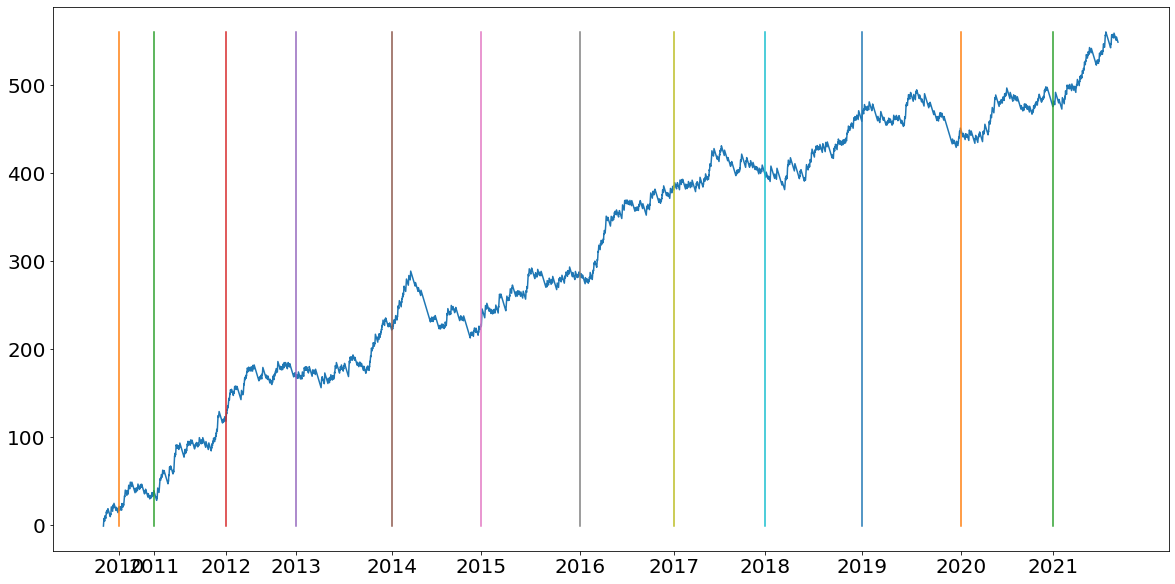

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()
index = []
label = []
for i in range(2010, 2022):
    x = matches[matches.date >= str(i)].index[0]
    plt.plot([x, x], [matches.cum_gain.min(), matches.cum_gain.max()])
    index.append(x),
    label.append(str(i))
xticks = plt.xticks(index, label)

<AxesSubplot:xlabel='year'>

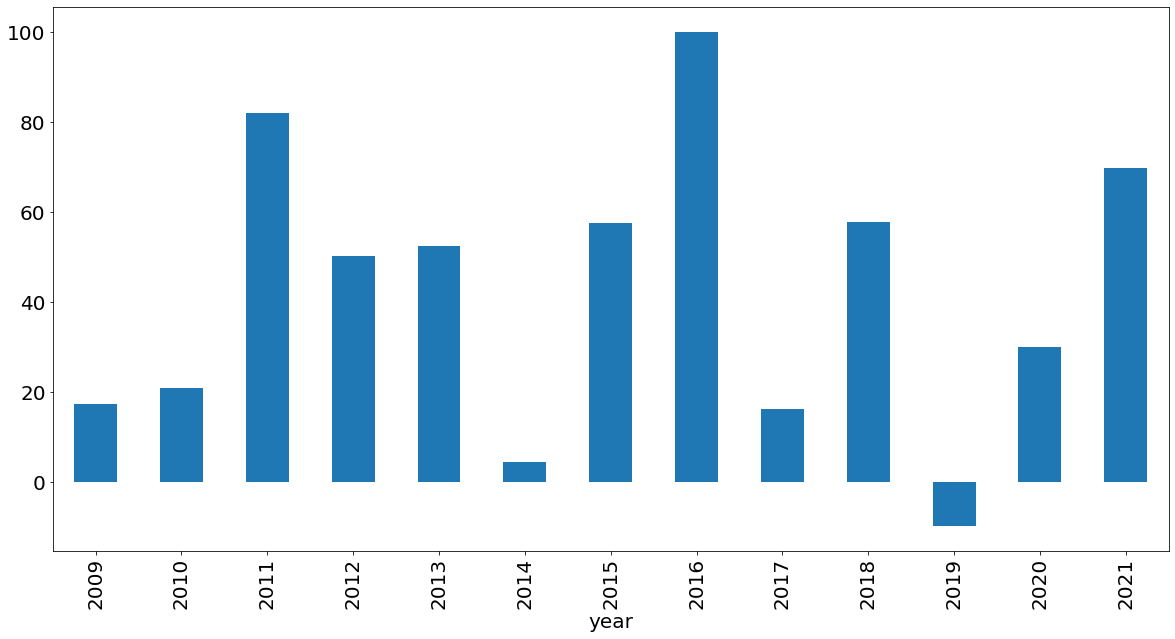

In [44]:
gain_by_year.plot.bar()

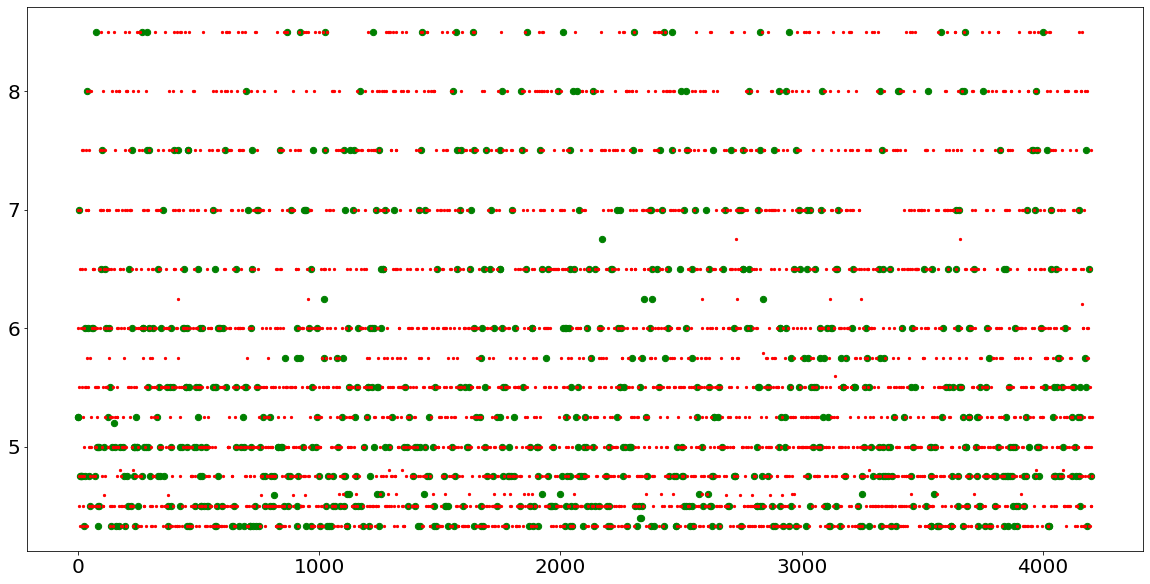

In [29]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

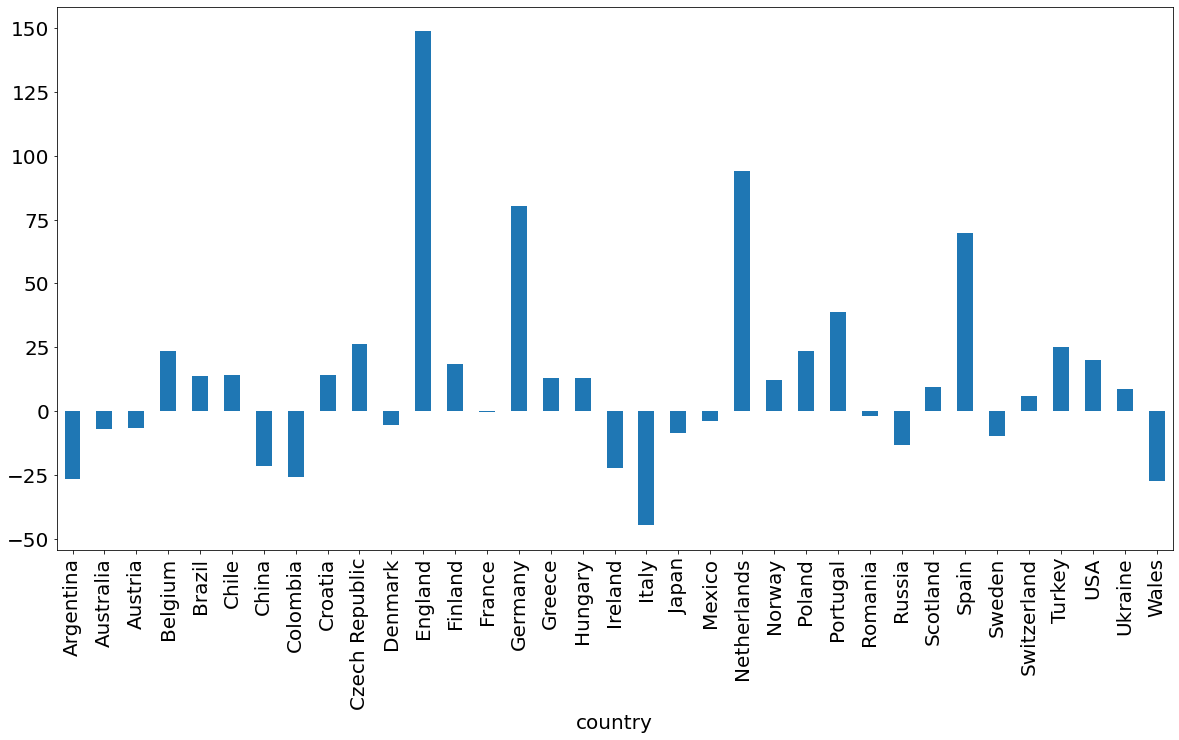

In [30]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

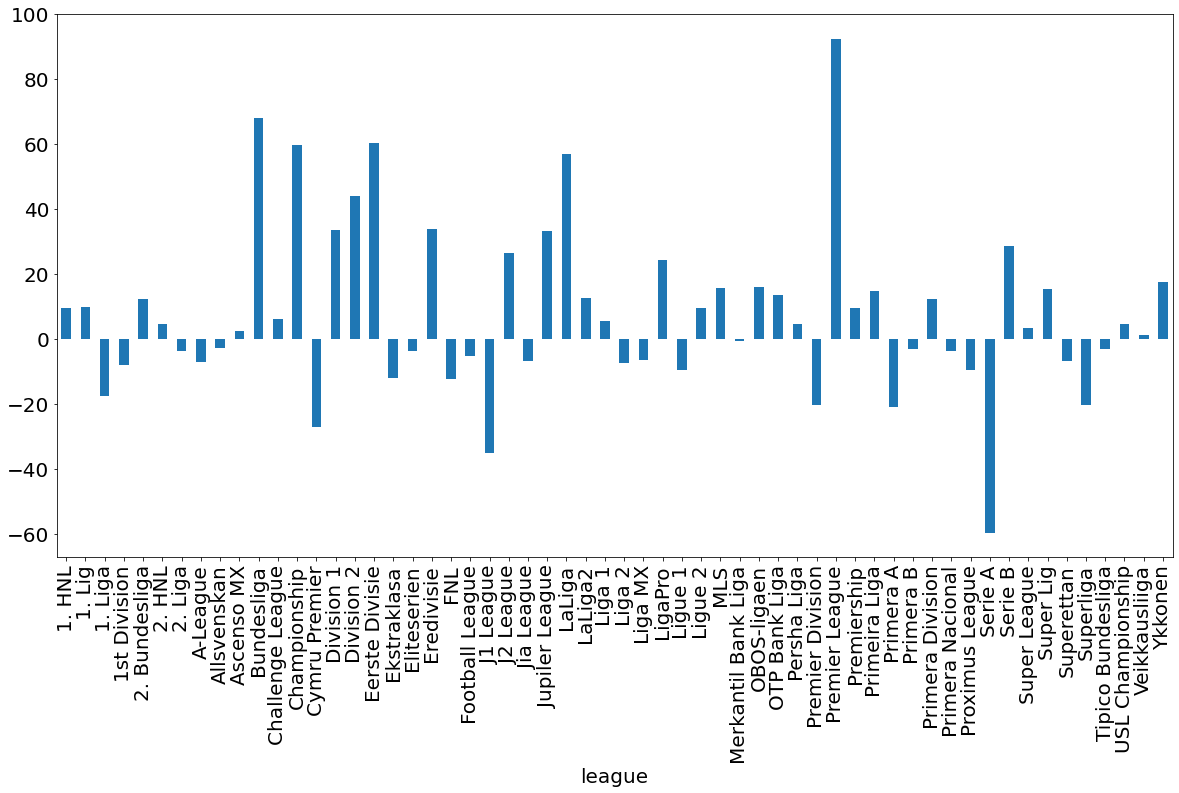

In [31]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()